# What is the correlation between genres and gross or budget figures? 

In [103]:
import ast
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("zippedData/movie_budgets_with_genres.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN


In [105]:
def convert_string_list(string):
    try:
        return ast.literal_eval(string)
    except:
        return None
    
def convert_dollar_to_int(dollar_with_commas_string):
    return int(dollar_with_commas_string.replace("$", "").replace(",", ""))

In [99]:
first_domestic_gross = df['domestic_gross'][0]
convert_dollar_to_int(first_domestic_gross)

760507625

In [107]:
df['domestic_gross'] = df['domestic_gross'].apply(convert_dollar_to_int)
df['worldwide_gross'] = df['worldwide_gross'].apply(convert_dollar_to_int)
df['production_budget'] = df['production_budget'].apply(convert_dollar_to_int)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN


In [69]:
# convert genres strings to lists
df['genres'] = df['genres'].apply(convert_string_list)
df['genres'][0]

[28, 12, 14, 878]

In [70]:
# convert dollars to ints
df['production_budget'] = df['production_budget'].apply(convert_dollar_to_int)
df['domestic_gross'] = df['domestic_gross'].apply(convert_dollar_to_int)

In [71]:
# remove columns without a genre
df_cleaned = df.dropna(axis=0, subset=['genres'])

In [72]:
df_cleaned['genres'][0]

[28, 12, 14, 878]

In [73]:
df_cleaned.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279","[28, 12, 14, 878]"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875","[12, 28, 14]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963","[28, 12, 878]"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200","[12, 28, 14]"
8,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209","[28, 12, 14, 878]"


# we want each genre number to be it's own column

In [74]:
def get_first_genre(genre_list):
    try:
        return genre_list[0]
    except:
        return -10

In [75]:
df_cleaned['first_genre'] = df_cleaned['genres'].apply(get_first_genre)
df_cleaned.head()

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,first_genre
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279","[28, 12, 14, 878]",28
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875","[12, 28, 14]",12
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963","[28, 12, 878]",28
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200","[12, 28, 14]",12
8,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209","[28, 12, 14, 878]",28


In [76]:
df_cleaned_working = df_cleaned.loc[df_cleaned['first_genre']>=0]
df_cleaned_working.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,first_genre
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279","[28, 12, 14, 878]",28
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875","[12, 28, 14]",12
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963","[28, 12, 878]",28
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200","[12, 28, 14]",12
8,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209","[28, 12, 14, 878]",28


# convert my production_budget data to numerical

### how many different first genres are there

In [77]:
top_10_movies = df_cleaned_working['first_genre'].value_counts().sort_values(ascending=False)[:10]

In [78]:
top_10_movies.index

Int64Index([18, 28, 35, 27, 53, 12, 80, 16, 99, 878], dtype='int64')

In [79]:
top_10_movies_df = df_cleaned_working.loc[(df_cleaned_working['first_genre']==18) |
                          (df_cleaned_working['first_genre']==28) | 
                          (df_cleaned_working['first_genre']==35) | 
                          (df_cleaned_working['first_genre']==27) |
                          (df_cleaned_working['first_genre']==53)]

In [80]:
top_10_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,first_genre
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279","[28, 12, 14, 878]",28
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963","[28, 12, 878]",28
8,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209","[28, 12, 14, 878]",28
9,10,"Nov 6, 2015",Spectre,300000000,200074175,"$879,620,923","[28, 12, 80]",28
10,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,"$1,084,439,099","[28, 80, 18, 53]",28


# Let's compare their production budgets!
To do this we're using a violin plot

In [87]:
top_10_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,first_genre
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279","[28, 12, 14, 878]",28
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963","[28, 12, 878]",28
8,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209","[28, 12, 14, 878]",28
9,10,"Nov 6, 2015",Spectre,300000000,200074175,"$879,620,923","[28, 12, 80]",28
10,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,"$1,084,439,099","[28, 80, 18, 53]",28


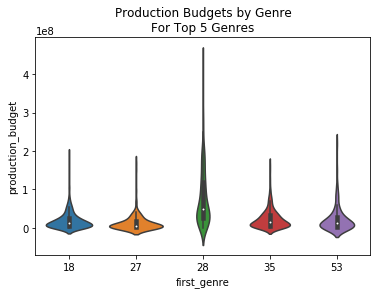

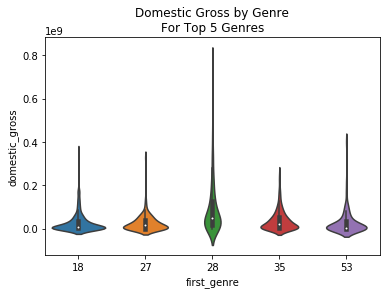

In [86]:
sns.violinplot(x='first_genre', y='production_budget', data=top_10_movies_df)
plt.title("Production Budgets by Genre\nFor Top 5 Genres")
plt.show()

sns.violinplot(x='first_genre', y='domestic_gross', data=top_10_movies_df)
plt.title("Domestic Gross by Genre\nFor Top 5 Genres")
plt.show()

In [88]:
# diffs
top_10_movies_df['diffs'] = top_10_movies_df['domestic_gross']-top_10_movies_df['production_budget']

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


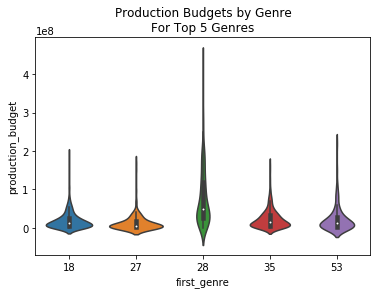

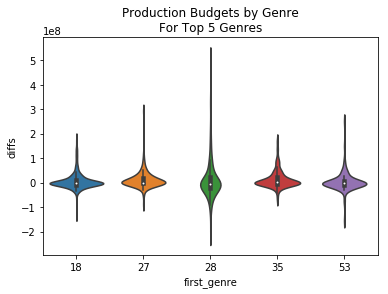

In [90]:
sns.violinplot(x='first_genre', y='production_budget', data=top_10_movies_df)
plt.title("Production Budgets by Genre\nFor Top 5 Genres")
plt.show()


sns.violinplot(x='first_genre', y='diffs', data=top_10_movies_df)
plt.title("Production Budgets by Genre\nFor Top 5 Genres")
plt.show()

# Investigate which genres were conditioned poorly